Definir:
1 - Evolução quantitativa de clientes ativos por mês
2 - Classificar os clientes por volume e frequencia de compra.
3 - O que cada cliente compra e com que frequência.
4 - Evolução dos produtos Oferecidos
5 - Classificar produtos por tipo.Varios produtos identicos com códigos diferentes em função da embalagem
6 - Análise geográfica x volume x produto

In [1]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define Moeda Brasileira numeros R$ 1.000,00
locale.setlocale( locale.LC_ALL, '' )
#locale.currency( g, grouping = True )

'Portuguese_Brazil.1252'

In [2]:
from numpy.random import randn
#np.random.seed(101)

In [3]:
# Abre o dataset
df = pd.read_csv('C:/Mettricx/Projetos/SupraAlimentos/DataSet/NFe-SupraAlimentos.csv')


In [4]:
df.head()

,cliente,NF,data,CNPJ,cidade,bairro,UF,cod,descricao,QTY,unidade,preco
0,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,4,2014-08-29,27833615002018,RIO DE JANEIRO,CASIMIRO DE ABREU,RJ,20002,ALHO CEBOLA PICADINHO S/SAL 180GR,1,UN,2.77
1,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,5,2014-08-29,9309021000168,RIO DE JANEIRO,VILA NOVA DE CAMPOS,RJ,10002,ALECRIM 15GR,1,UN,1.11
2,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,10001,ACAFRAO 15GR,12,UN,9.72
3,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,10002,ALECRIM 15GR,1,UN,1.11
4,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,10009,CALDO DE CARNE COM ERVAS FINAS 60GR,1,UN,1.43


####  Total sales turnover in the period


In [5]:
#g = float("{0:.2f}".format(df['preco'].sum())) 
#FaturamentoTotal = locale.currency( g, grouping = True ) 
FaturamentoTotal=df['preco'].sum()


In [6]:
FaturamentoTotal

11677734.969999999

#### Purchases by Customers

In [7]:

NFClientes = df[['cliente','CNPJ','NF','data']] 

In [8]:
NFClientes = NFClientes.drop_duplicates()

In [9]:
NFClientes = NFClientes.sort_values(by=['cliente','data'],ascending=True, na_position='first').reset_index(drop=True)

In [10]:
NFClientes.head()

,cliente,CNPJ,NF,data
0,311 HAMILTON IMPORTACAO E EXPORTACAO EIRELI - ME,28108298000177,6961,2017-10-12
1,974 DA LOBO MERCADO EIRELI - ME,28044530000150,7385,2017-12-02
2,974 DA LOBO MERCADO EIRELI - ME,28044530000150,7386,2017-12-02
3,A A DE AZEVEDO SILVEIRA COMERCIO VAREJISTA DE ...,28891624000165,7294,2017-11-27
4,A A DE AZEVEDO SILVEIRA COMERCIO VAREJISTA DE ...,28891624000165,7611,2017-12-17


#### Total invoices issued in the period

In [11]:
NFe_TotalEmitidas = len(NFClientes)

In [12]:
NFe_TotalEmitidas

6627

#### Value of each Invoice

In [13]:
ValorNotasFiscais = df.groupby('NF')["preco"].sum().rename("Total_NF").reset_index()

In [14]:
ValorNotasFiscais.head()

,NF,Total_NF
0,4,2.77
1,5,1.11
2,6,15.24
3,7,1.39
4,8,1.39


#### Table Merge - Customers and Invoice

In [15]:

Valor_NFe = pd.merge(ValorNotasFiscais, NFClientes, how='inner', on=['NF'])

In [16]:
Valor_NFe = Valor_NFe.sort_values(by=['cliente','data'],ascending=True, na_position='first').reset_index(drop=True)

In [17]:
Valor_NFe.head()

,NF,Total_NF,cliente,CNPJ,data
0,6961,788.51,311 HAMILTON IMPORTACAO E EXPORTACAO EIRELI - ME,28108298000177,2017-10-12
1,7385,3379.11,974 DA LOBO MERCADO EIRELI - ME,28044530000150,2017-12-02
2,7386,2326.92,974 DA LOBO MERCADO EIRELI - ME,28044530000150,2017-12-02
3,7294,817.58,A A DE AZEVEDO SILVEIRA COMERCIO VAREJISTA DE ...,28891624000165,2017-11-27
4,7611,325.16,A A DE AZEVEDO SILVEIRA COMERCIO VAREJISTA DE ...,28891624000165,2017-12-17


#### Create a file grouped by Customers and Invoice

In [18]:
Valor_NFe.to_csv('C:/Mettricx/Projetos/SupraAlimentos/PowerBI/NFe_Emitidas.csv',encoding='utf-8', index=False)

#### How often a customer did a purchase (frequency) or Number of invoices issued to that customer

In [22]:
qtyDeCompras =  Valor_NFe[['NF']].groupby([Valor_NFe['CNPJ']]).size().rename("QtyCompras").reset_index()

In [23]:
qtyDeCompras = qtyDeCompras.sort_values(by=['QtyCompras'],ascending=False, na_position='first').reset_index(drop=True)


In [24]:
qtyDeCompras.head()

,CNPJ,QtyCompras
0,17339293000139,142
1,12434859000198,136
2,22536813000133,115
3,29840154000173,72
4,19068286000175,69


In [25]:
qtyDeCompras['frequencia']=(qtyDeCompras['QtyCompras']/NFe_TotalEmitidas)*100

In [26]:
qtyDeCompras = qtyDeCompras.sort_values(by=['frequencia'],ascending=False, na_position='first').reset_index(drop=True)

In [27]:
qtyDeCompras.head()

,CNPJ,QtyCompras,frequencia
0,17339293000139,142,2.142749
1,12434859000198,136,2.052211
2,22536813000133,115,1.735325
3,29840154000173,72,1.086464
4,19068286000175,69,1.041195


#### Customer Purchase Volume  

In [28]:
#compraDeClientes = df[['CNPJ','preco']].groupby([df['CNPJ']]).sum().reset_index()
compraDeClientes = df[['preco']].groupby([df['CNPJ']]).sum().reset_index()
compraDeClientes.head()

,CNPJ,preco
0,175479000105,14429.17
1,334392000206,1511.64
2,381613000116,6249.46
3,803210000118,11911.61
4,814123000166,9583.20


In [29]:
compraDeClientes = compraDeClientes.rename(index=str, columns={"CNPJ": "CNPJ", "preco": "Compras"})

In [33]:
compraDeClientes = compraDeClientes.sort_values(by=['Compras'],ascending=False, na_position='first').reset_index(drop=True)

In [34]:
compraDeClientes.head()

,CNPJ,Compras
0,12360891000176,474946.97
1,15116388000168,367559.08
2,12434859000198,362693.84
3,29840154000173,300708.01
4,19068286000175,287622.97


In [35]:
compraDeClientes['P%_Compras']=(compraDeClientes['Compras']/FaturamentoTotal)*100

#### Customers, purchases, %Total

In [36]:
compraDeClientes.head(10)

,CNPJ,Compras,P%_Compras
0,12360891000176,474946.97,4.067116
1,15116388000168,367559.08,3.147520
2,12434859000198,362693.84,3.105858
3,29840154000173,300708.01,2.575054
4,19068286000175,287622.97,2.463003
5,17339293000139,216302.26,1.852262
6,39508023000228,179723.79,1.539030
7,27833615001984,160547.14,1.374814
8,5565335000170,153918.48,1.318051
9,9653290000147,153882.33,1.317741


In [37]:
# Faz o MERGE dos dois Datasets
clientes_Classificacao = pd.merge(compraDeClientes, qtyDeCompras, how='inner', on=['CNPJ'])

In [38]:
clientes_Classificacao.head()

,CNPJ,Compras,P%_Compras,QtyCompras,frequencia
0,12360891000176,474946.97,4.067116,26,0.392334
1,15116388000168,367559.08,3.147520,23,0.347065
2,12434859000198,362693.84,3.105858,136,2.052211
3,29840154000173,300708.01,2.575054,72,1.086464
4,19068286000175,287622.97,2.463003,69,1.041195


In [ ]:
clientes_Classificacao.head(10)


#### Geographical coordinates of Brazilian cities

In [39]:
cidades = pd.read_csv('C:/Mettricx/Projetos/SupraAlimentos/DataSet/MunicipiosBrasil.csv', names=['id','latitude','longitude','cidade','UF','Valor'],encoding = 'utf8')


In [40]:
cidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 6 columns):
id           5509 non-null int64
latitude     5509 non-null float64
longitude    5509 non-null float64
cidade       5509 non-null object
UF           5509 non-null object
Valor        5509 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 258.3+ KB


In [41]:
cidades.drop(['id'],axis = 1, inplace = True)

In [42]:
cidades.head()

,latitude,longitude,cidade,UF,Valor
0,-9.82,-66.88,ACRELANDIA,AC,39560.03891
1,-10.94,-69.56,ASSIS BRASIL,AC,17842.15099
2,-11.01,-68.74,BRASILEIA,AC,93373.39431
3,-9.83,-67.95,BUJARI,AC,28516.56749
4,-10.57,-67.67,CAPIXABA,AC,18886.45514


#### Customer File

In [43]:
clientes = pd.read_csv('C:/Mettricx/Projetos/SupraAlimentos/PowerBI/Supra_Clientes.csv')

In [44]:
clientes.head()

,CNPJ,cliente,UF,cidade,bairro
0,7394215000183,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA
1,23673682000107,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS
2,9190998000109,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA
3,35994433000275,MERCADO HORTICAXIXE LTDA EPP,ES,ARACRUZ,BARRA DO RIACHO
4,8357136000165,SUPERMERCADO VALLIN LTDA,ES,ARACRUZ,BARRA DO SAHY


#### Merge to define the Customer's Geographical location

In [48]:
s1 = pd.merge(clientes,cidades , on=['cidade','UF'])

In [49]:
s1 = s1.sort_values(by=['UF','cidade','cliente'],ascending=True, na_position='first').reset_index(drop=True)

In [50]:
s1.head()

,CNPJ,cliente,UF,cidade,bairro,latitude,longitude,Valor
0,7394215000183,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA,-17.89,-39.37,184301.3617
1,23673682000107,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS,-17.34,-39.22,157085.2382
2,9190998000109,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA,-20.79,-40.65,111105.3093
3,31759699000444,COMERCIAL DEVENS LTDA,ES,ARACRUZ,COQUEIRAL,-19.82,-40.27,392874.5203
4,31759699000363,COMERCIAL DEVENS LTDA.,ES,ARACRUZ,CENTRO,-19.82,-40.27,392874.5203


In [51]:
Supra_Cli = pd.merge(s1,clientes_Classificacao , on=['CNPJ'])

In [52]:
Supra_Cli.head()

,CNPJ,cliente,UF,cidade,bairro,latitude,longitude,Valor,Compras,P%_Compras,QtyCompras,frequencia
0,7394215000183,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA,-17.89,-39.37,184301.3617,704.52,0.006033,1,0.015090
1,23673682000107,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS,-17.34,-39.22,157085.2382,886.80,0.007594,1,0.015090
2,9190998000109,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA,-20.79,-40.65,111105.3093,668.00,0.005720,2,0.030180
3,31759699000444,COMERCIAL DEVENS LTDA,ES,ARACRUZ,COQUEIRAL,-19.82,-40.27,392874.5203,1350.46,0.011564,3,0.045269
4,31759699000363,COMERCIAL DEVENS LTDA.,ES,ARACRUZ,CENTRO,-19.82,-40.27,392874.5203,4533.71,0.038824,6,0.090539


In [53]:
Supra_Cli = Supra_Cli.sort_values(by=['UF','cidade','cliente'],ascending=True, na_position='first').reset_index(drop=True)

In [54]:
Supra_Cli.head()

,CNPJ,cliente,UF,cidade,bairro,latitude,longitude,Valor,Compras,P%_Compras,QtyCompras,frequencia
0,7394215000183,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA,-17.89,-39.37,184301.3617,704.52,0.006033,1,0.015090
1,23673682000107,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS,-17.34,-39.22,157085.2382,886.80,0.007594,1,0.015090
2,9190998000109,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA,-20.79,-40.65,111105.3093,668.00,0.005720,2,0.030180
3,31759699000444,COMERCIAL DEVENS LTDA,ES,ARACRUZ,COQUEIRAL,-19.82,-40.27,392874.5203,1350.46,0.011564,3,0.045269
4,31759699000363,COMERCIAL DEVENS LTDA.,ES,ARACRUZ,CENTRO,-19.82,-40.27,392874.5203,4533.71,0.038824,6,0.090539


#### Update Customer's Table with Geographical location

In [55]:
Supra_Cli.to_csv('C:/Mettricx/Projetos/SupraAlimentos/PowerBI/Supra_Cli_Features.csv',encoding='utf-8', index=False)

In [57]:
Supra_Cli.drop(['CNPJ'],axis = 1, inplace = True)

In [58]:
Supra_Cli.head()

,cliente,UF,cidade,bairro,latitude,longitude,Valor,Compras,P%_Compras,QtyCompras,frequencia
0,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA,-17.89,-39.37,184301.3617,704.52,0.006033,1,0.015090
1,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS,-17.34,-39.22,157085.2382,886.80,0.007594,1,0.015090
2,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA,-20.79,-40.65,111105.3093,668.00,0.005720,2,0.030180
3,COMERCIAL DEVENS LTDA,ES,ARACRUZ,COQUEIRAL,-19.82,-40.27,392874.5203,1350.46,0.011564,3,0.045269
4,COMERCIAL DEVENS LTDA.,ES,ARACRUZ,CENTRO,-19.82,-40.27,392874.5203,4533.71,0.038824,6,0.090539


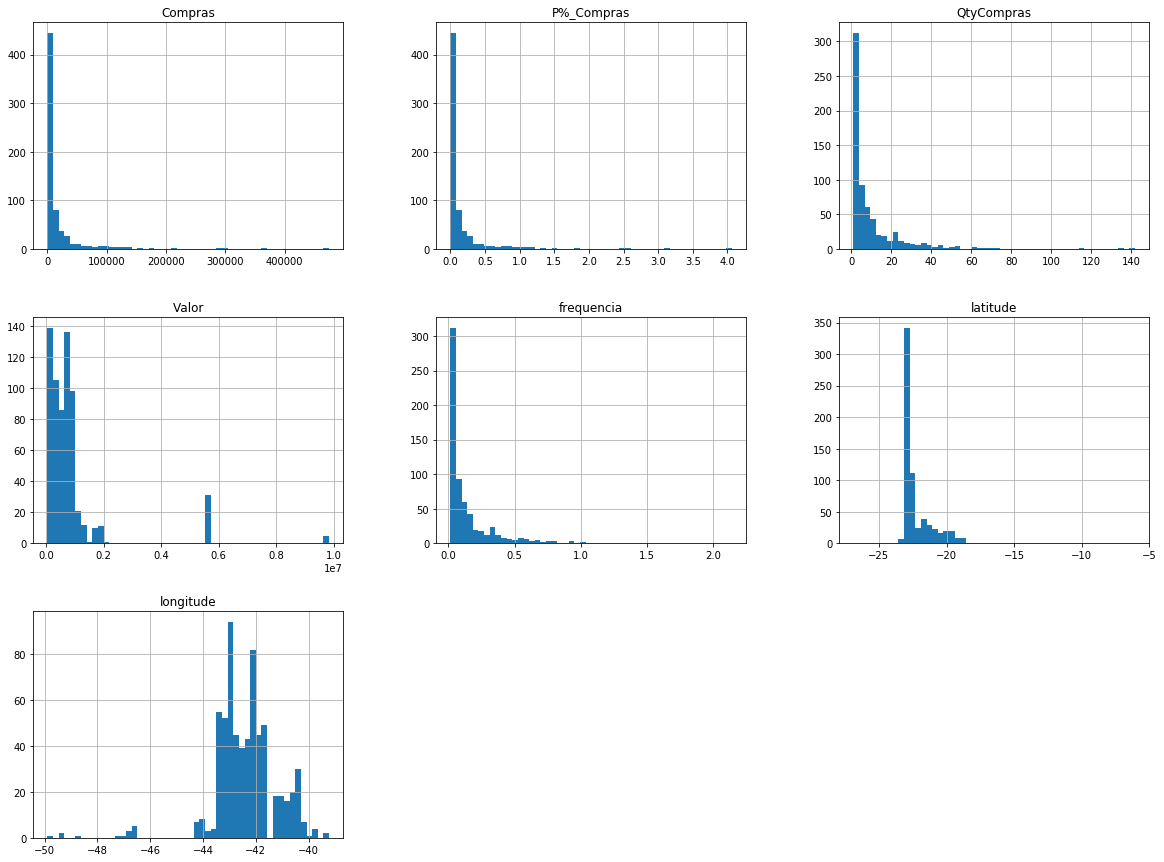

In [59]:
import matplotlib.pyplot as plt
Supra_Cli.hist(bins=50, figsize=(20,15))
plt.show()

In [63]:
Supra_Cli['latitude'] = Supra_Cli['latitude'] *-1

In [65]:
Supra_Cli['longitude'] = Supra_Cli['longitude']*-1

In [93]:
x = Supra_Cli.iloc[:,[5,6]].values

In [94]:
x

array([[3.93700000e+01, 1.84301362e+05],
       [3.92200000e+01, 1.57085238e+05],
       [4.06500000e+01, 1.11105309e+05],
       ...,
       [4.66300000e+01, 9.83943600e+06],
       [4.66300000e+01, 9.83943600e+06],
       [4.66300000e+01, 9.83943600e+06]])

#### Finding number of cluster

In [95]:
import scipy.cluster.hierarchy as sch

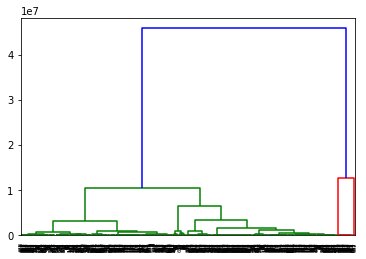

In [96]:
dendogran = sch.dendrogram(sch.linkage(x, method='ward'))

#### Fitting the cluster

In [97]:
from sklearn.cluster import AgglomerativeClustering

In [98]:
hc = AgglomerativeClustering(n_clusters = 3, affinity= 'euclidean', linkage = 'ward')

In [99]:
y_hc = hc.fit(x)

Text(0,0.5,'Compras')

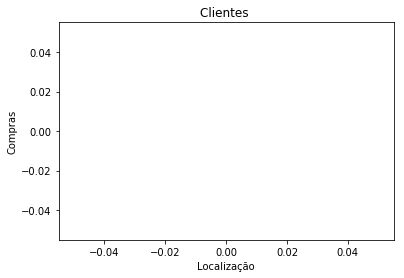

In [103]:
# Visualising the clusters
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 600, c = 'red',  label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clientes ')
plt.xlabel('Localização')
plt.ylabel('Compras')

In [105]:
from sklearn.cluster import KMeans

Text(0,0.5,'Compras')

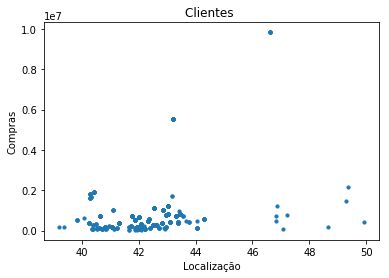

In [111]:
plt.scatter(x[:,0],x[:,1], s=10, linewidths = 1)
plt.title('Clientes ')
plt.xlabel('Localização')
plt.ylabel('Compras')

In [112]:
clf =  KMeans(n_clusters = 3)

In [113]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [114]:
centroids = clf.cluster_centers_

In [115]:
labels = clf.labels_

In [116]:
colors = ["g.","r.","c.","b."]

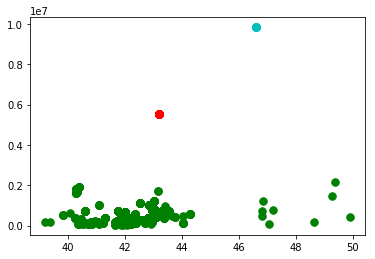

In [126]:
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 10, linewidths = 10)
for i in range(len(x)):
    plt.plot(x[i][0],x[i][1], colors[labels[i]], markersize=15)



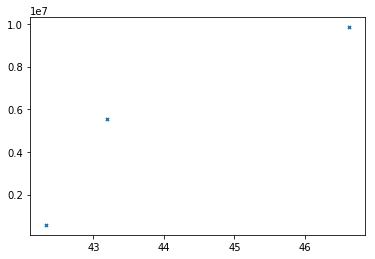

In [121]:
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 10, linewidths = 1)